#  Linear Regression

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

### Uploading data

In [2]:
url = "https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/Dataset.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Date,symbol,sector,score,close,return_rate
0,2004-02-11,SU,Energy Minerals,0.953727,12.830000,NaN
1,2004-02-11,GGG,Producer Manufacturing,0.952753,9.322222,NaN
2,2004-02-11,CWT,Utilities,0.934181,14.245000,NaN
3,2004-02-11,BLL,Process Industries,0.922862,8.012500,NaN
4,2004-02-11,APA,Energy Minerals,0.912117,39.509998,NaN


In [4]:
nan_rows = data[data['return_rate'].isnull()]
if nan_rows.symbol.nunique() == len(nan_rows):
    print("NaN for first period")


NaN for first period


Replacing NaNs with 0 value:

In [5]:
data['return_rate'] = data['return_rate'].fillna(0)

Looking at the tail of the data, meaning the newest observations:

In [6]:
data.tail()

,Date,symbol,sector,score,close,return_rate
30546,2022-02-09,PEP,Consumer Non-Durables,0.701507,171.940002,-0.003189
30547,2022-02-09,SSNC,Technology Services,0.701123,82.419998,0.025890
30548,2022-02-09,GEF,Process Industries,0.697954,56.930000,-0.001753
30549,2022-02-09,DPZ,Consumer Services,0.697741,444.760010,0.015272
30550,2022-02-09,LIFZF,Non-Energy Minerals,0.695644,34.410000,0.069630


### Information about dataset

Data types:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30551 entries, 0 to 30550
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         30551 non-null  object 
 1   symbol       30551 non-null  object 
 2   sector       30551 non-null  object 
 3   score        30551 non-null  float64
 4   close        30551 non-null  float64
 5   return_rate  30551 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.4+ MB


Checking if there is any lack of data:

In [8]:
data.isnull().sum()

Date           0
symbol         0
sector         0
score          0
close          0
return_rate    0
dtype: int64

Changing the type of 'date' variable:

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data = data.set_index('Date')

#### Fundamental statistics on numeric variables

In [10]:
data.describe()

,score,close,return_rate
count,30551.000000,30551.000000,30551.000000
mean,0.731206,101.353658,0.003849
std,0.117692,2627.016498,0.044643
min,0.413554,0.020000,-0.951550
25%,0.653428,26.072500,-0.016298
50%,0.741474,44.770000,0.002865
75%,0.813471,73.910004,0.023672
max,0.987225,453000.000000,0.632911


There are in total 30 551 observations. The mean score for this dataset is 0,73, mean closing price is 101,3 and mean return rate is 0,004.

In [11]:
data.symbol.value_counts()

SHW      170
GEF      140
ORLY     138
INGR     122
GPC      122
        ... 
ATSG       1
POST       1
DWSN       1
AMIVF      1
AGCO       1
Name: symbol, Length: 1338, dtype: int64

There are 1338 companies in total, some of them occur only once in the time series and some even over 100 times. 

### Visualization of return rate for 2004 - 2022

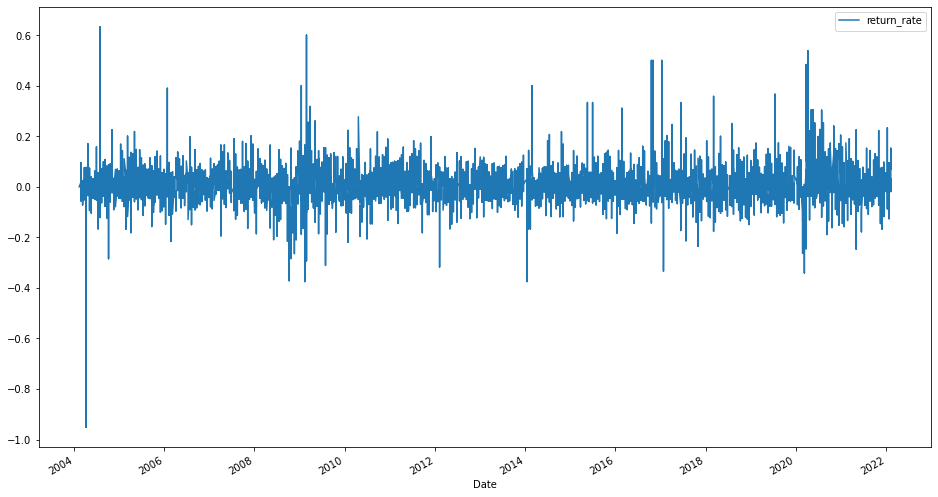

In [13]:
fig, ax=plt.subplots(figsize=(16, 9))
data['return_rate'].plot(ax=ax, label='return_rate')

ax.legend();

The figure shows return rates since 2004 to 2022. It has a lot of deviations, seasonality is not observed. The highest deviance was observed in 2004. In years from 2008 and 2010 the biggest fluctuations on return rates were noted.

### Splitting the data into training and testing sets

Training set involves data from 2010 to 2020 and testing set includes the year 2021.


In [15]:
X_train = data['2010':'2020'].drop(['symbol','sector','return_rate', 'close'], axis = 1)
y_train = data.loc['2010':'2020', 'return_rate']

X_test = data['2021'].drop(['symbol','sector','return_rate', 'close'], axis = 1)
y_test = data.loc['2021', 'return_rate']

/Users/wiktoriaekwinska/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


In [16]:
X_train.head()

,score
Date,
2010-01-13,0.895419
2010-01-13,0.839992
2010-01-13,0.829445
2010-01-13,0.809663
2010-01-13,0.774477


In [17]:
y_train.shape

(19797,)

In [18]:
y_test.shape

(2021,)

In [19]:
X_train.shape

(19797, 1)

In [20]:
X_test.shape

(2021, 1)

Testing sets have 2021 observations and training sets consist of 19797 obserations.

### Dummy regression

In [21]:
from sklearn.dummy import DummyRegressor

In [22]:
reg_dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 

y_pred_dum = reg_dummy.predict(X_test)

reg_dummy.score(X_train, y_train)

0.0

In [23]:
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_pred_dum)))
print("Median absolute error (linear model): {:.2f}".format(median_absolute_error(y_test, y_pred_dum)))

Mean squared error (linear model): 0.00
Median absolute error (linear model): 0.02


### Linear regression

In [24]:
lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

lm.score(X_train, y_train)

0.005437296983874185

In [25]:
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("Median absolute error (linear model): {:.2f}".format(median_absolute_error(y_test, y_pred)))

Mean squared error (linear model): 0.00
Median absolute error (linear model): 0.02


### Comparison between dummy regression and linear regression in combination with observations from testing sets

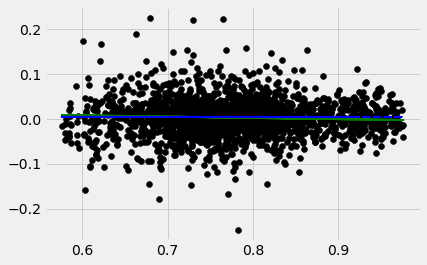

In [28]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.plot(X_test, y_pred_dum, color='blue', linestyle = 'dashed', 
        linewidth=2, label = 'dummy')
